In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [10]:
X_train[0].shape

(28, 28)

In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

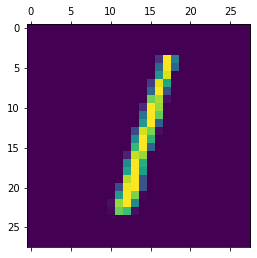

In [20]:
plt.matshow(X_test[2])

In [15]:
y_train[2]

4

In [16]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [17]:
X_train.shape

(60000, 28, 28)

In [29]:
X_train = X_train / 255
X_test = X_test / 255

In [30]:
X_train_flattened = X_train.reshape(len(X_train),28*28)

X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [31]:
X_test_flattened.shape

(10000, 784)

In [32]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [33]:
#Sequential = Stack of layers in neural network
#Dense = All neurons in one layer are connected with every neurons in the other layer
# keras.layers.Dense(output,input,activation function)

model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

#epochs = number of iteration neural network will run the training
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4677 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3037 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2838 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9255


In [34]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2664 - accuracy: 0.9253


[0.266385942697525, 0.9253000020980835]

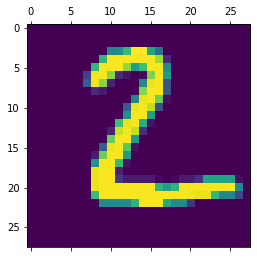

In [39]:
plt.matshow(X_test[1])

In [41]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 0s 1ms/step


array([4.3205541e-01, 5.7556499e-03, 9.9958950e-01, 4.3257079e-01,
       3.9818213e-10, 8.5834712e-01, 8.9837557e-01, 5.9992620e-13,
       1.7953973e-01, 1.4341468e-09], dtype=float32)

In [42]:
np.argmax(y_predicted[1]) 

2

In [45]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [46]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [48]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    4,    5,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   7,    9,  930,   14,    7,    4,   11,   11,   36,    3],
       [   4,    0,   22,  915,    0,   26,    2,   12,   22,    7],
       [   2,    2,    7,    2,  912,    0,   12,    4,    9,   32],
       [  10,    3,    3,   29,    8,  785,   14,    6,   28,    6],
       [  14,    3,    6,    1,    7,   13,  911,    2,    1,    0],
       [   1,   10,   24,    5,    7,    1,    0,  947,    1,   32],
       [   8,   10,    7,   19,    9,   35,   10,   11,  857,    8],
       [  11,    7,    1,   10,   27,    9,    0,   25,    5,  914]])>

Text(69.0, 0.5, 'Truth')

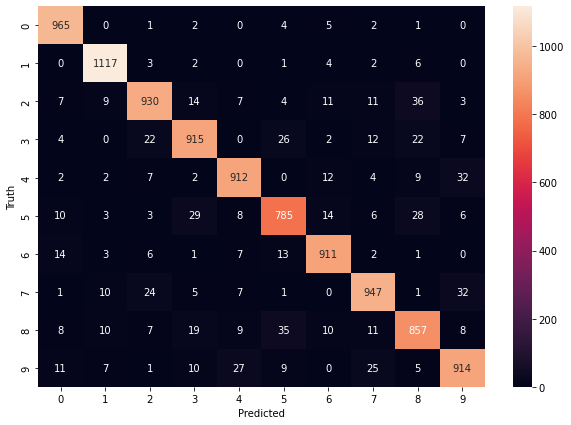

In [49]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
model = keras.Sequential([
    #Hidden layer
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

#epochs = number of iteration neural network will run the training
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2693 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1221 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0849 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0653 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0512 - accuracy: 0.9842


In [51]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0822 - accuracy: 0.9746


[0.08224252611398697, 0.9746000170707703]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

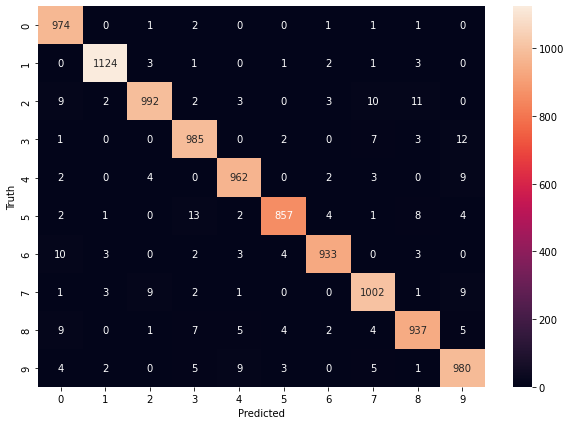

In [53]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

#epochs = number of iteration neural network will run the training
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2745 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1247 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0872 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0648 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0524 - accuracy: 0.9835
